# Spam Email Classifier

# Goal:
1. Compare the accuracy of different machine learning and deep learning model to predict classification of spam email.
2. Deploy the classifer built on ANN model as a data application accessible for email import.

In [1]:
##libraries
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree,svm



In [52]:
df=pd.read_csv("emails.csv")


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5172 entries, 0 to 5171
Columns: 3002 entries, Email No. to Prediction
dtypes: int64(3001), object(1)
memory usage: 118.5+ MB


In [4]:
df=df.drop(columns=['Email No.'])

In [5]:
df

,the,to,ect,and,for,of,a,you,hou,in,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,0,0,1,0,0,0,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,8,13,24,6,6,2,102,1,27,18,...,0,0,0,0,0,0,0,1,0,0
2,0,0,1,0,0,0,8,0,0,4,...,0,0,0,0,0,0,0,0,0,0
3,0,5,22,0,5,1,51,2,10,1,...,0,0,0,0,0,0,0,0,0,0
4,7,6,17,1,5,2,57,0,9,3,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5167,2,2,2,3,0,0,32,0,0,5,...,0,0,0,0,0,0,0,0,0,0
5168,35,27,11,2,6,5,151,4,3,23,...,0,0,0,0,0,0,0,1,0,0
5169,0,0,1,1,0,0,11,0,0,1,...,0,0,0,0,0,0,0,0,0,1
5170,2,7,1,0,2,1,28,2,0,8,...,0,0,0,0,0,0,0,1,0,1


In [6]:
##regex
df=df.replace(to_replace=r'[^a-zA-Z]',value=float('nan'),regex=True)
df.fillna(0,inplace=True)

In [7]:
##convert the data into integer type
df=df.astype(int)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5172 entries, 0 to 5171
Columns: 3001 entries, the to Prediction
dtypes: int32(3001)
memory usage: 59.2 MB


In [53]:
##split the data into independent and dependent variable
X=df.iloc[:,:-1].values
y=df.iloc[:,-1].values
X

array([['Email 1', 0, 0, ..., 0, 0, 0],
       ['Email 2', 8, 13, ..., 0, 1, 0],
       ['Email 3', 0, 0, ..., 0, 0, 0],
       ...,
       ['Email 5170', 0, 0, ..., 0, 0, 0],
       ['Email 5171', 2, 7, ..., 0, 1, 0],
       ['Email 5172', 22, 24, ..., 0, 0, 0]], dtype=object)

In [10]:
##split the data into trainning and testing set
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=32)

# Logistic regression 
Logistics regression a supervised machine learning algorithm that predicts the probability, ranging from 0 to 1, of a datapoint belonging to a specific category, or class. These probabilities can then be used to assign, or classify, observations to the more probable group.

In [54]:
##train the logistic regression
model_LR=LogisticRegression()
model_LR.fit(X_train,y_train)
pred_LR=model_LR.predict(X_test)

C:\Users\V\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [55]:
##classification report
print(classification_report(y_test,pred_LR))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97       716
           1       0.94      0.93      0.94       319

    accuracy                           0.96      1035
   macro avg       0.96      0.95      0.96      1035
weighted avg       0.96      0.96      0.96      1035



In [56]:
##evaluate accuracy
accuracy_LR=accuracy_score(y_test,pred_LR)
conf_mat=confusion_matrix(y_test,pred_LR)
print(accuracy_LR)
print(conf_mat)## interpret it diagonally

0.9623188405797102
[[698  18]
 [ 21 298]]


# K-Nearest Neighbors 
KNN is a classification algorithm. The central idea is that data points with similar attributes tend to fall into similar categories.

In [15]:
##select the best k value
Accuracies=[]
for k in range(1,20):
    Knn_model=KNeighborsClassifier(n_neighbors=k)
    Knn_model.fit(X_train,y_train)
    Accuracies.append(Knn_model.score(X_test,y_test))
k_list=range(1,20)

Text(0.5, 1.0, 'Knn Classifier accuracy')

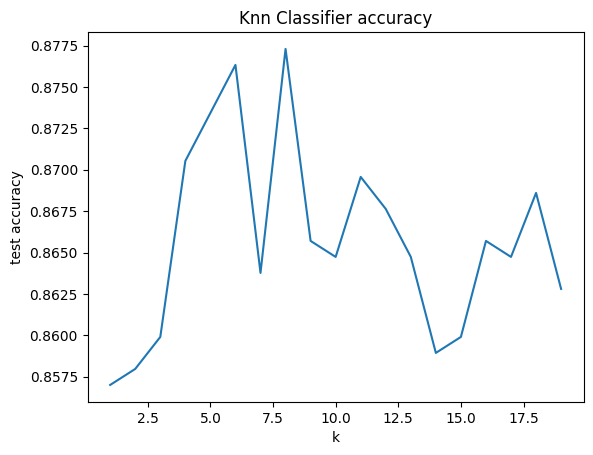

In [16]:
plt.plot(k_list,Accuracies)
plt.xlabel('k')
plt.ylabel('test accuracy')
plt.title('Knn Classifier accuracy')

Best K value is around 8

In [17]:
##train the KNN model
Knn_model=KNeighborsClassifier(n_neighbors=8)
Knn_model.fit(X_train,y_train)
pred_knn=Knn_model.predict(X_test)

In [57]:
##classification report
print(classification_report(y_test,pred_knn))

              precision    recall  f1-score   support

           0       0.91      0.91      0.91       716
           1       0.80      0.80      0.80       319

    accuracy                           0.88      1035
   macro avg       0.86      0.85      0.86      1035
weighted avg       0.88      0.88      0.88      1035



In [19]:
##evaluate accuracy
accuracy_knn=accuracy_score(y_test,pred_knn)
conf_mat=confusion_matrix(y_test,pred_knn)
print(accuracy_knn)
print(conf_mat)## interpret it diagonally

0.8772946859903382
[[654  62]
 [ 65 254]]


# Decision Tree
Decision tree is a flowchart-like structure in which each internal node represents a "test" on an attribute.

In [20]:
##decision tree
Decision_tree_gini=tree.DecisionTreeClassifier(criterion='gini',random_state=100,max_depth=3,min_samples_leaf=5)
Decision_tree_entropy=DecisionTreeClassifier(criterion='entropy',random_state=100, max_depth=3,max_features=5)
Decision_tree_max_depth=DecisionTreeClassifier(max_depth=5)



In [21]:
Decision_tree_gini.fit(X_train,y_train)
Decision_tree_entropy.fit(X_train,y_train)#entropy???
Decision_tree_max_depth.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=5)

In [22]:
# Make prediction
y_pred_gini = Decision_tree_gini.predict(X_test)
y_pred_entropy = Decision_tree_entropy.predict(X_test)
y_pred_depth3 = Decision_tree_max_depth.predict(X_test)

In [23]:
##evaluate accuracy
accuracy_gini=accuracy_score(y_test,y_pred_gini)
conf_mat=confusion_matrix(y_test,y_pred_gini)
print(accuracy_gini)
print(conf_mat)

0.8347826086956521
[[690  26]
 [145 174]]


In [24]:
accuracy_entropy=accuracy_score(y_test,y_pred_entropy)
conf_mat=confusion_matrix(y_test,y_pred_entropy)
print(accuracy_entropy)
print(conf_mat)

0.7130434782608696
[[688  28]
 [269  50]]


In [ ]:
accuracy_max_depth=accuracy_score(y_test,y_pred_depth3)
conf_mat=confusion_matrix(y_test,y_pred_depth3)
print(accuracy_max_depth)
print(conf_mat)

0.8405797101449275
[[700  16]
 [149 170]]


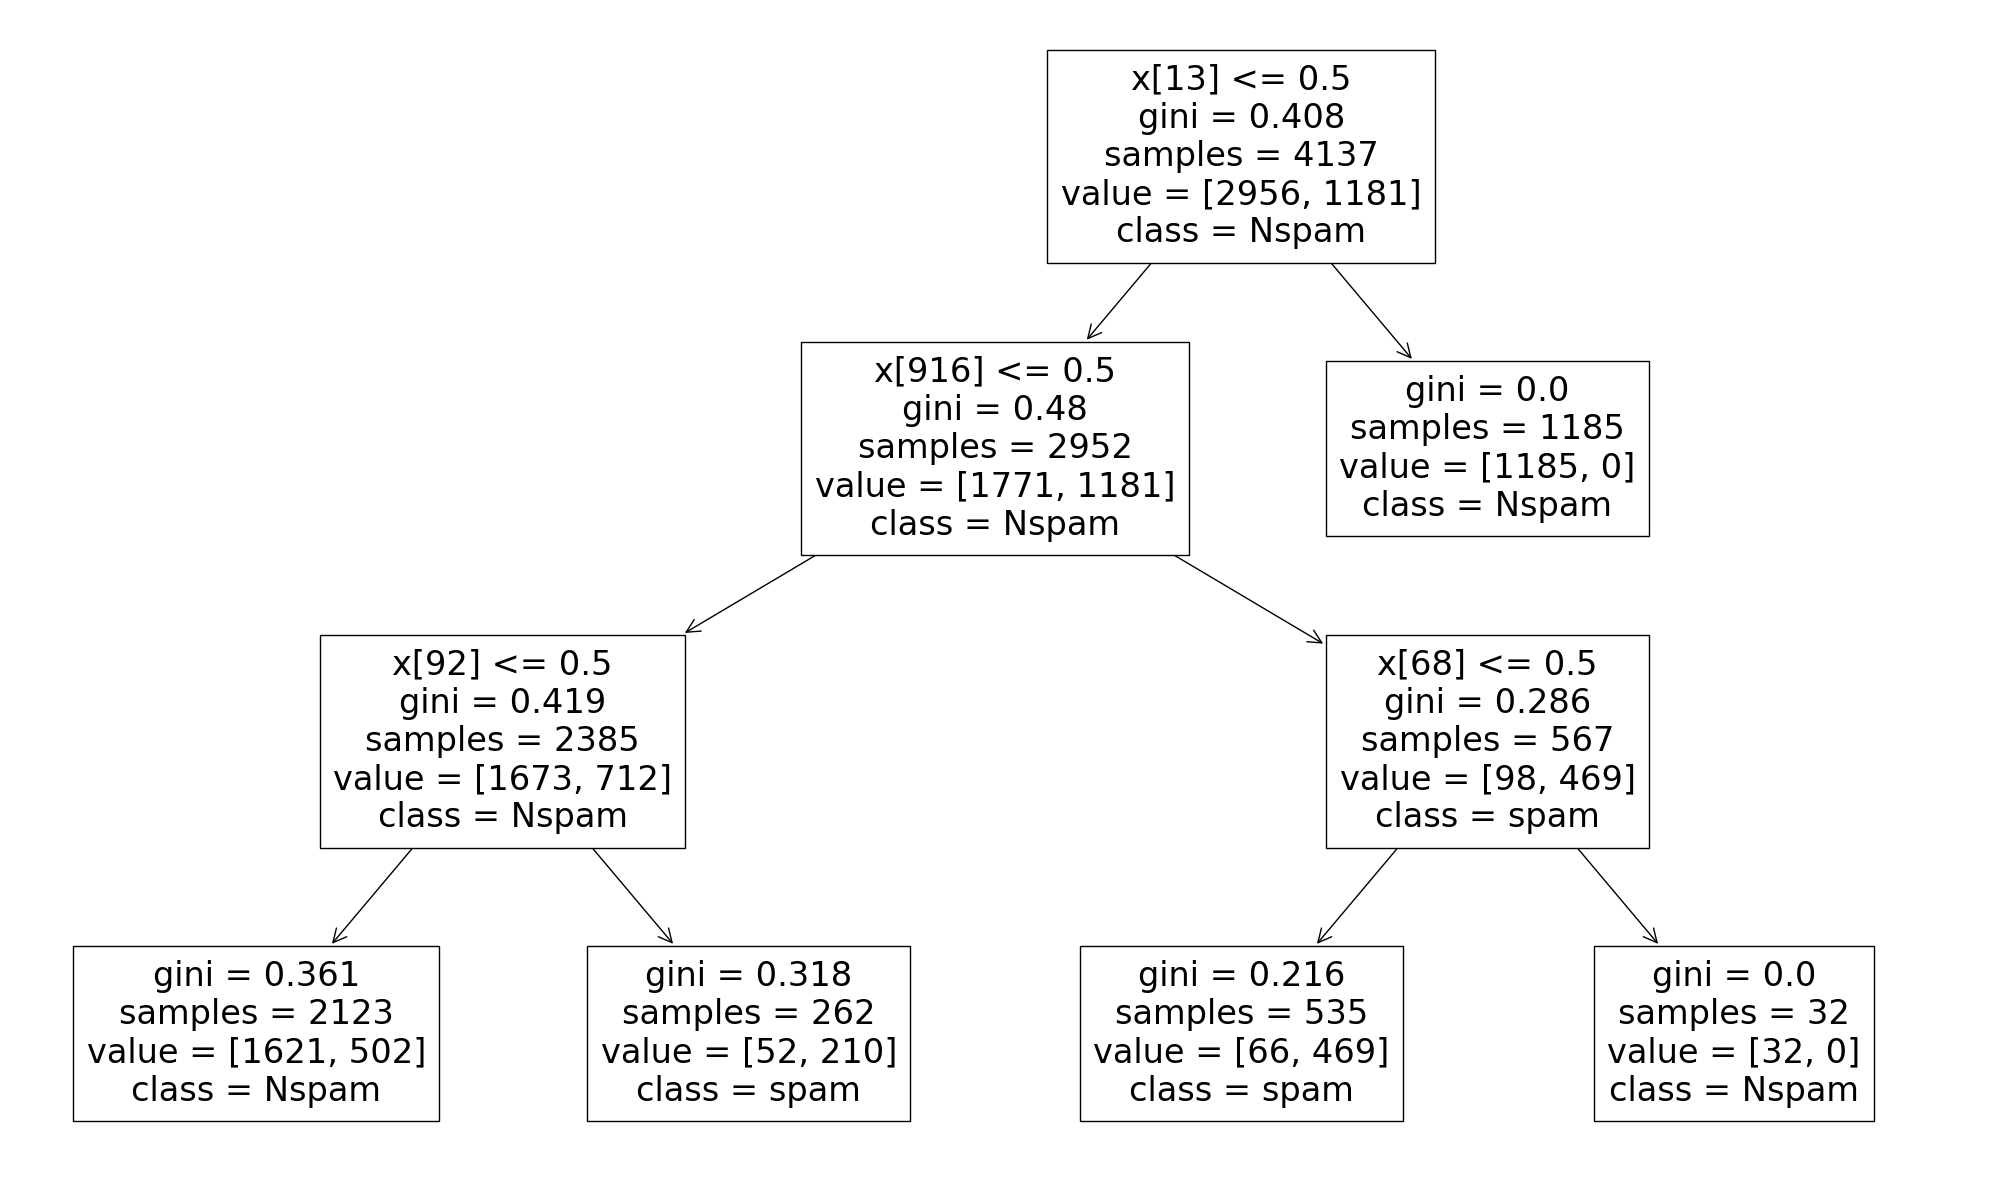

In [25]:
## Plotting the Tree
plt.figure(figsize=(20,12))
tree.plot_tree(Decision_tree_gini,class_names=['Nspam','spam'])
plt.tight_layout()
plt.show()

# Support Vector Machines
 
An SVM makes classifications by defining a decision boundary and then seeing what side of the boundary an unclassified point falls on.

In [27]:
#Create a SVM Classifier
clfLinear = svm.SVC(kernel='linear')
clfsigmoid = svm.SVC(kernel='sigmoid') 
clfrbf = svm.SVC(kernel='rbf') 

In [28]:
#Train the model using the training sets
clfLinear.fit(X_train, y_train)
clfsigmoid.fit(X_train, y_train)
clfrbf.fit(X_train, y_train)

SVC()

In [29]:
#Predict the response for test dataset
y_pred_linear = clfLinear.predict(X_test)
y_pred_sigmoid = clfsigmoid.predict(X_test)
y_pred_rbf = clfrbf.predict(X_test)

In [60]:
accuracy_clflinear=accuracy_score(y_test,y_pred_linear)
conf_mat=confusion_matrix(y_test,y_pred_linear)
print(accuracy_clflinear)
print(conf_mat)

0.9449275362318841
[[693  23]
 [ 34 285]]


In [62]:
accuracy_clfsigmoid=accuracy_score(y_test,y_pred_sigmoid)
conf_mat=confusion_matrix(y_test,y_pred_sigmoid)
print(accuracy_clfsigmoid)
print(conf_mat)

0.6231884057971014
[[541 175]
 [215 104]]


In [65]:
accuracy_clfrbf=accuracy_score(y_test,y_pred_rbf)
conf_mat=confusion_matrix(y_test,y_pred_rbf)
print(accuracy_clfrbf)
print(conf_mat)

0.7961352657004831
[[696  20]
 [191 128]]


In [66]:
print(classification_report(y_test,y_pred_linear))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96       716
           1       0.93      0.89      0.91       319

    accuracy                           0.94      1035
   macro avg       0.94      0.93      0.93      1035
weighted avg       0.94      0.94      0.94      1035



## Neural network

In [35]:
from keras.models import Sequential
from keras.layers import Dense,Dropout
from mlxtend.plotting import plot_confusion_matrix

In [36]:
##initialis the NN
model=Sequential()

##set up the layers
#input layer
model.add(Dense(units=15, kernel_initializer='uniform',input_dim=3000,activation='relu'))##input_dim should be the amount of data col
#hidden layer
model.add(Dense(units=5, kernel_initializer='uniform',activation='relu'))
##regularization
model.add(Dropout(0.2))
##output layer
model.add(Dense(units=1, kernel_initializer='uniform',activation='sigmoid'))

## compliling the ANN
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [37]:
##train the model
history=model.fit(X_train,y_train, batch_size=10, epochs=10,validation_split=0.30)

Epoch 1/10
290/290 [==============================] - 3s 4ms/step - loss: 0.5460 - accuracy: 0.7168 - val_loss: 0.2724 - val_accuracy: 0.8961
Epoch 2/10
290/290 [==============================] - 1s 2ms/step - loss: 0.2202 - accuracy: 0.9264 - val_loss: 0.1575 - val_accuracy: 0.9622
Epoch 3/10
290/290 [==============================] - 1s 2ms/step - loss: 0.1501 - accuracy: 0.9561 - val_loss: 0.1336 - val_accuracy: 0.9710
Epoch 4/10
290/290 [==============================] - 1s 3ms/step - loss: 0.1274 - accuracy: 0.9661 - val_loss: 0.2762 - val_accuracy: 0.9646
Epoch 5/10
290/290 [==============================] - 1s 3ms/step - loss: 0.1091 - accuracy: 0.9720 - val_loss: 0.1034 - val_accuracy: 0.9815
Epoch 6/10
290/290 [==============================] - 1s 3ms/step - loss: 0.0712 - accuracy: 0.9786 - val_loss: 0.1289 - val_accuracy: 0.9734
Epoch 7/10
290/290 [==============================] - 1s 3ms/step - loss: 0.0600 - accuracy: 0.9817 - val_loss: 0.1047 - val_accuracy: 0.9831
Epoch 

In [38]:
## make prediction
y_pred_ann=model.predict(X_test)
y_pred_ann=np.where(y_pred_ann>0.5,1,0)

33/33 [==============================] - 0s 1ms/step


In [39]:
y_pred_ann

array([[0],
       [0],
       [0],
       ...,
       [1],
       [0],
       [1]])

In [40]:
print(y_test.shape)#1D
print(y_pred_ann.shape)#2D

(1035,)
(1035, 1)


In [41]:
##convery multiple dimension array to 1
y_pred_ann=y_pred_ann.flatten()
print(y_test.shape)#1D
print(y_pred_ann.shape)#2D

(1035,)
(1035,)


In [43]:
##classification report
print(classification_report(y_test,y_pred_ann))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98       716
           1       0.97      0.95      0.96       319

    accuracy                           0.97      1035
   macro avg       0.97      0.97      0.97      1035
weighted avg       0.97      0.97      0.97      1035



In [44]:
cm=confusion_matrix(y_test,y_pred_ann)
cm

array([[707,   9],
       [ 17, 302]], dtype=int64)

Text(0.5, 1.0, 'confusion_matrix')

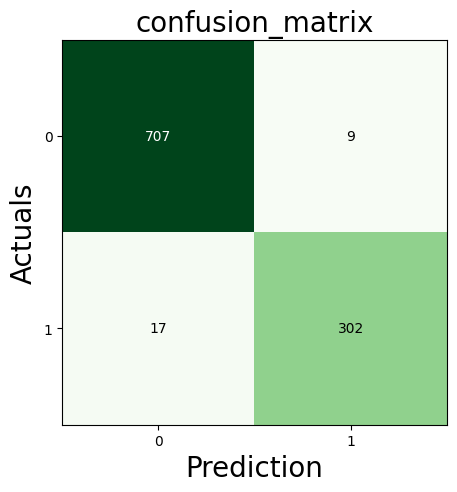

In [45]:
## plot a confusion matrix
fig, ax=plot_confusion_matrix(conf_mat=cm,figsize=(5,5),cmap=plt.cm.Greens)
plt.xlabel('Prediction',fontsize=20)
plt.ylabel('Actuals',fontsize=20)
plt.title('confusion_matrix',fontsize=20)

# Comparison result of all above model:
*Ann model* got the highest accuracy. It will be deployed as a data application.


In [51]:
##save the logistics regression model
import pickle
#Save the model to file
with open('Spam_classifier_model.pkl','wb') as file:
    pickle.dump(model,file)

Keras weights file (<HDF5 file "variables.h5" (mode r+)>) saving:
...layers\dense
......vars
.........0
.........1
...layers\dense_1
......vars
.........0
.........1
...layers\dense_2
......vars
.........0
.........1
...layers\dropout
......vars
...metrics\mean
......vars
.........0
.........1
...metrics\mean_metric_wrapper
......vars
.........0
.........1
...optimizer
......vars
.........0
.........1
.........10
.........11
.........12
.........2
.........3
.........4
.........5
.........6
.........7
.........8
.........9
...vars
Keras model archive saving:
File Name                                             Modified             Size
config.json                                    2023-02-27 14:13:41         2073
metadata.json                                  2023-02-27 14:13:41           64
variables.h5                                   2023-02-27 14:13:41       565000


(See the data application deploy in the next .py file)